In [144]:
import numpy as np 
import pandas as pd 
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [157]:
data_path = "Training.csv"

data = pd.read_csv(data_path)

#data.head()

# Reading the train.csv by removing the 
# last column since it's an empty column
data = pd.read_csv(data_path).dropna(axis=1)
# filtered_symptoms = [
#     "headache", "fatigue", "runny_nose", "continuous_sneezing", "nausea",
#     "vomiting", "diarrhoea", "joint_pain", "stomach_pain", "abdominal_pain",
#     "chills", "sweating", "weakness_in_limbs", "muscle_pain", "dizziness",
#     "back_pain", "loss_of_appetite", "dehydration", "indigestion", "constipation",
#     "cold_hands_and_feets", "cough", "high_fever", "throat_irritation", "mild_fever","prognosis"
# ]
symptoms_to_drop = [
    # Previously dropped
    "extra_marital_contacts", "receiving_unsterile_injections", "receiving_blood_transfusion",
    "history_of_alcohol_consumption", "coma", "distention_of_abdomen", "fluid_overload",
    "toxic_look_(typhos)", "enlarged_thyroid", "abnormal_menstruation", "dischromic _patches",
    "blackheads", "scurring", "silver_like_dusting", "small_dents_in_nails", "inflammatory_nails",
    "yellow_crust_ooze", "blister", "red_sore_around_nose", "pus_filled_pimples", "rusty_sputum",
    "mucoid_sputum", "prominent_veins_on_calf", "blood_in_sputum", "stomach_bleeding",
    "swollen_blood_vessels", "visual_disturbances", "lack_of_concentration", "altered_sensorium",
    "polyuria", "palpitations", "slurred_speech", "watering_from_eyes",
    "obesity", "brittle_nails", "puffy_face_and_eyes", "drying_and_tingling_lips",
    "passage_of_gases", "irritation_in_anus", "foul_smell_of urine", "continuous_feel_of_urine",
    "unsteadiness", "spinning_movements", "weakness_of_one_body_side", "loss_of_smell",
    "movement_stiffness", "swelling_joints", "hip_joint_pain", "knee_pain", "neck_pain",
    "cramps", "bruising", "painful_walking", "pain_in_anal_region", "pain_during_bowel_movements",
    "sinus_pressure", "congestion", "phlegm", "blurred_and_distorted_vision", "swollen_legs",
    "swollen_extremeties", "muscle_wasting", "redness_of_eyes", "cold_hands_and_feets"
]

data = data.drop_duplicates()
data = data.drop(columns=symptoms_to_drop)
data.head()

data.shape[1]
print(data[data['high_fever'] == 1]['prognosis'].value_counts())



prognosis
Chicken pox         9
Dengue              9
Typhoid             9
Jaundice            8
Hepatitis E         8
Tuberculosis        8
Common Cold         8
Pneumonia           8
Malaria             7
Bronchial Asthma    6
Impetigo            5
AIDS                4
Name: count, dtype: int64


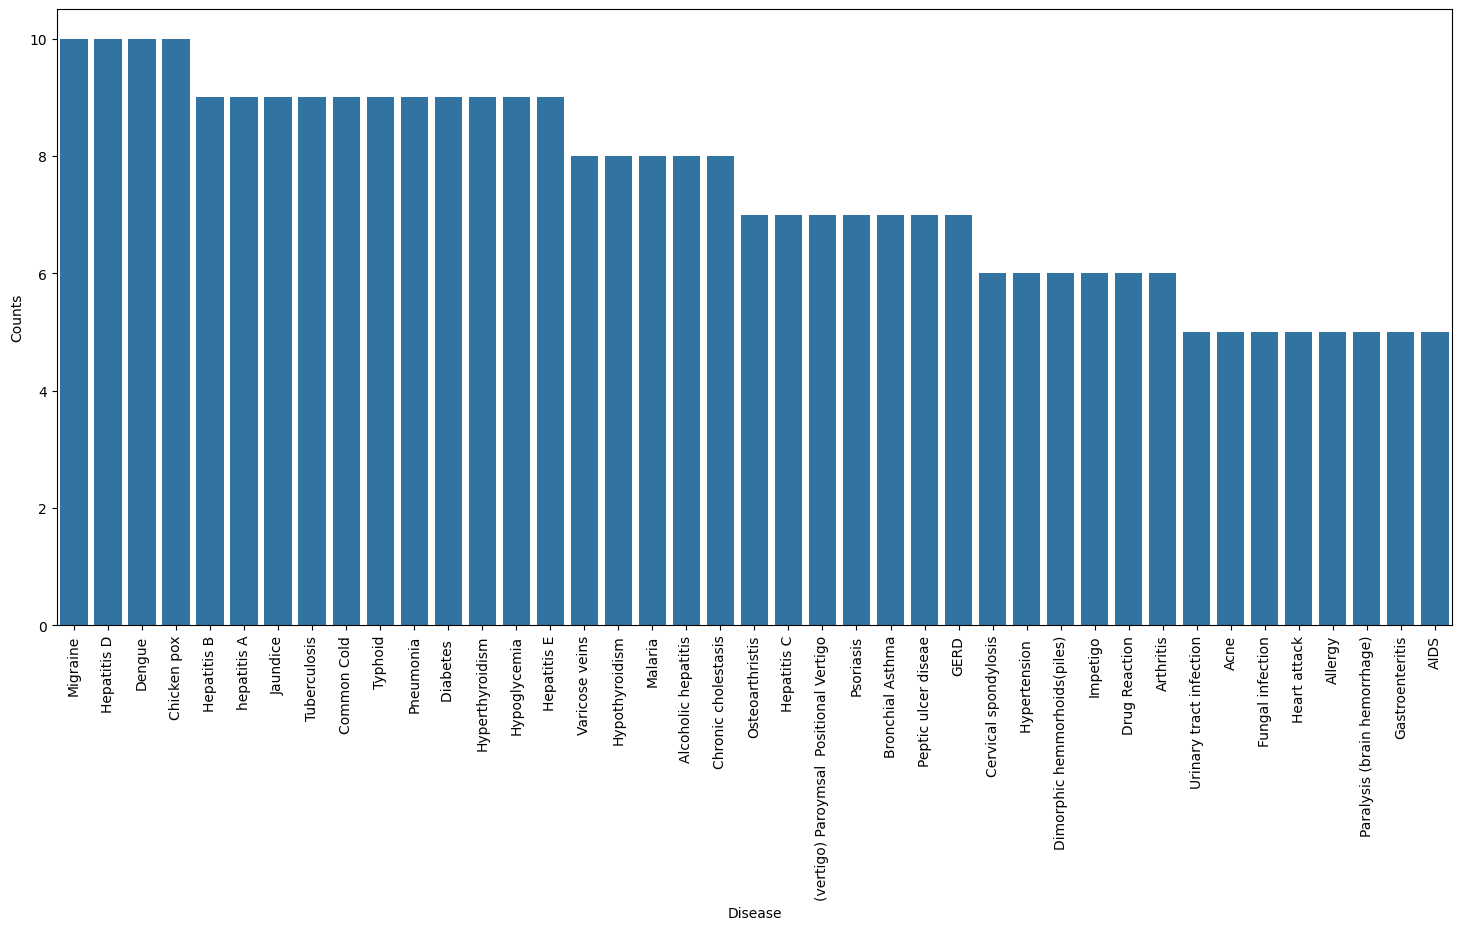

In [146]:
disease_counts = data['prognosis'].value_counts()

temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})


plt.figure(figsize=(18,8))
sns.barplot(x='Disease', y = 'Counts' , data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [148]:
encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])

In [149]:
test_data = pd.read_csv("Testing.csv").dropna(axis=1)
test_data.head()


#encoding the target value
test_data['prognosis'] = encoder.fit_transform(test_data['prognosis'])

In [151]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (243, 68), (243,)
Test: (61, 68), (61,)


In [152]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.93548387 0.90322581 0.93548387 0.90322581 0.96666667 0.9
 0.93333333 0.96666667 0.96666667 0.96666667]
Mean Score: 0.937741935483871
Gaussian NB
Scores: [1.         0.83870968 0.87096774 0.80645161 0.9        0.9
 0.86666667 0.96666667 0.96666667 0.96666667]
Mean Score: 0.9082795698924733
Random Forest
Scores: [0.96774194 0.90322581 0.93548387 0.90322581 0.96666667 0.93333333
 0.93333333 1.         1.         1.        ]
Mean Score: 0.9543010752688172


Accuracy on train data by SVM Classifier: 97.94238683127571
Accuracy on test data by SVM Classifier: 95.08196721311475


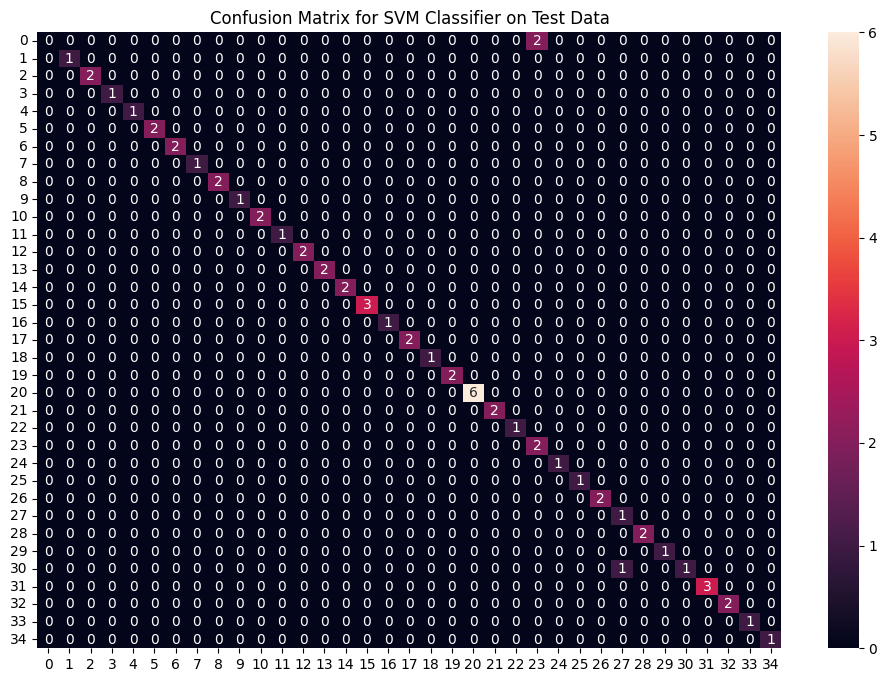

Accuracy on train data by Naive Bayes Classifier: 98.35390946502058
Accuracy on test data by Naive Bayes Classifier: 91.80327868852459


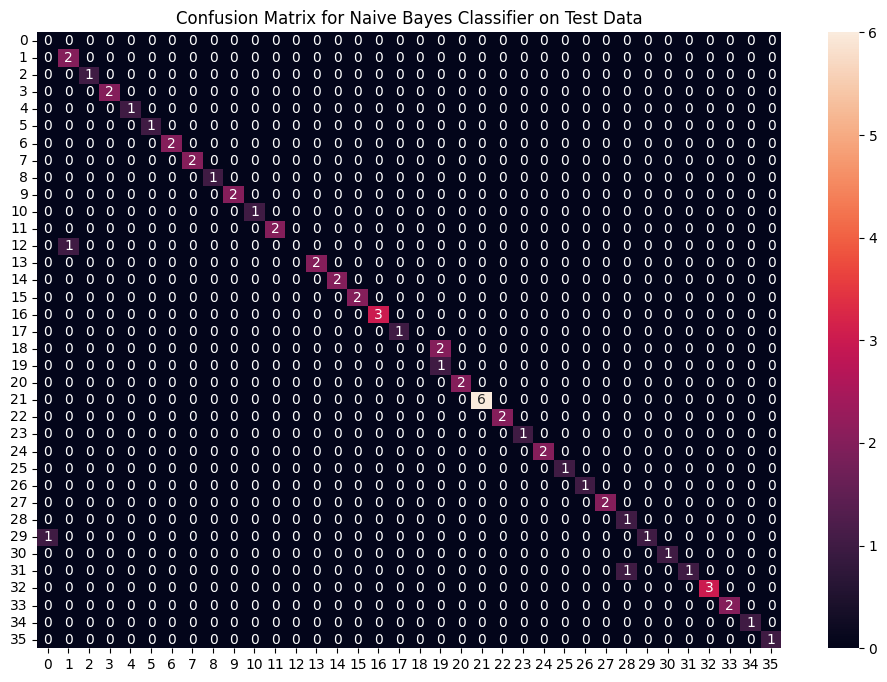

Accuracy on train data by Random Forest Classifier: 98.35390946502058
Accuracy on test data by Random Forest Classifier: 96.72131147540983


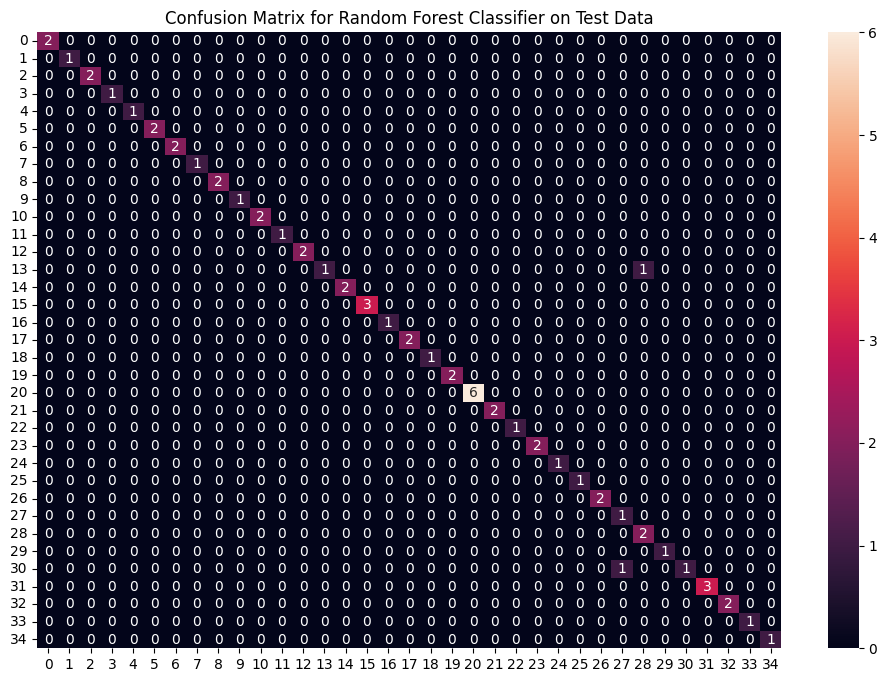

In [153]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accuracy on Test dataset by the combined model: 2.4390243902439024


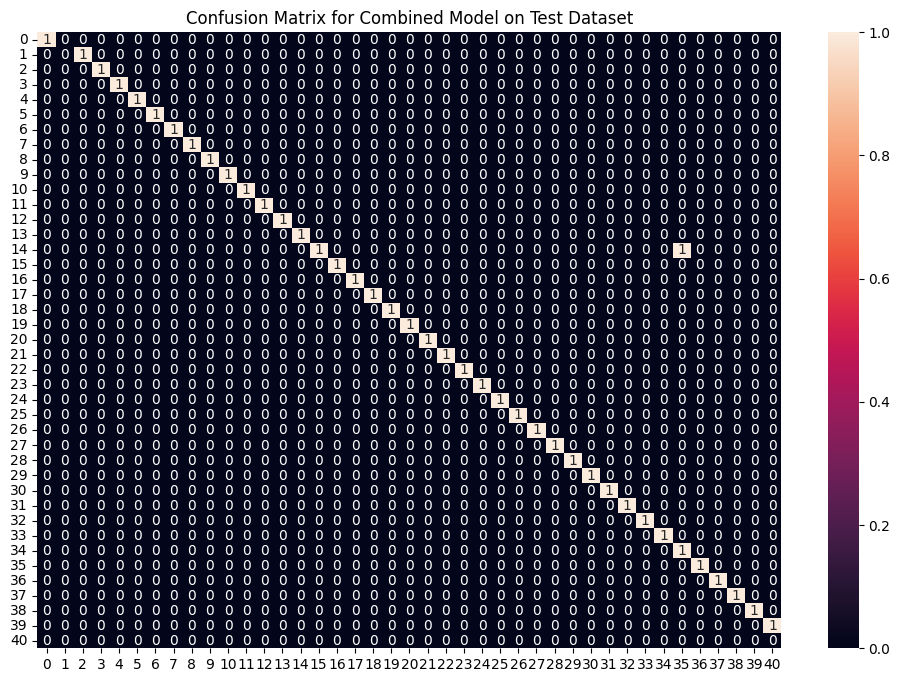

In [154]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)
# filtered_symptoms = [
#     "headache", "fatigue", "runny_nose", "continuous_sneezing", "nausea",
#     "vomiting", "diarrhoea", "joint_pain", "stomach_pain", "abdominal_pain",
#     "chills", "sweating", "weakness_in_limbs", "muscle_pain", "dizziness",
#     "back_pain", "loss_of_appetite", "dehydration", "indigestion", "constipation",
#     "cold_hands_and_feets", "cough", "high_fever", "throat_irritation", "mild_fever","prognosis"
# ]
symptoms_to_drop = [
    # Previously dropped
    "extra_marital_contacts", "receiving_unsterile_injections", "receiving_blood_transfusion",
    "history_of_alcohol_consumption", "coma", "distention_of_abdomen", "fluid_overload",
    "toxic_look_(typhos)", "enlarged_thyroid", "abnormal_menstruation", "dischromic _patches",
    "blackheads", "scurring", "silver_like_dusting", "small_dents_in_nails", "inflammatory_nails",
    "yellow_crust_ooze", "blister", "red_sore_around_nose", "pus_filled_pimples", "rusty_sputum",
    "mucoid_sputum", "prominent_veins_on_calf", "blood_in_sputum", "stomach_bleeding",
    "swollen_blood_vessels", "visual_disturbances", "lack_of_concentration", "altered_sensorium",
    "polyuria", "palpitations", "slurred_speech", "watering_from_eyes",
    "obesity", "brittle_nails", "puffy_face_and_eyes", "drying_and_tingling_lips",
    "passage_of_gases", "irritation_in_anus", "foul_smell_of urine", "continuous_feel_of_urine",
    "unsteadiness", "spinning_movements", "weakness_of_one_body_side", "loss_of_smell",
    "movement_stiffness", "swelling_joints", "hip_joint_pain", "knee_pain", "neck_pain",
    "cramps", "bruising", "painful_walking", "pain_in_anal_region", "pain_during_bowel_movements",
    "sinus_pressure", "congestion", "phlegm", "blurred_and_distorted_vision", "swollen_legs",
    "swollen_extremeties", "muscle_wasting", "redness_of_eyes", "cold_hands_and_feets"
]

test_data = test_data.drop(columns=symptoms_to_drop)
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions 
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

#!pip install scipy
from scipy import stats

final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()



In [155]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
symptoms = X.columns.values

#Creating a symptom index dictionary to encode the input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes":encoder.classes_
}
import joblib

# Save models
joblib.dump(final_rf_model, "rf_model.pkl")
joblib.dump(final_nb_model, "nb_model.pkl")
joblib.dump(final_svm_model, "svm_model.pkl")

# Save label encoder
joblib.dump(encoder, "label_encoder.pkl")

# Save symptom index
import json
with open("symptom_index.json", "w") as f:
    json.dump(data_dict["symptom_index"], f)


#Defining the functions
#Input: string containing symptoms seperated by commas
#Output : Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        formatted_symptom = " ".join([i.capitalize() for i in symptom.strip().split("_")])
        if formatted_symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][formatted_symptom]
            input_data[index] = 1
        else:
            print(f"❌ Symptom not found: {formatted_symptom}")
    
    input_data = np.array(input_data).reshape(1,-1)

    rf_predictions = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_predictions = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_predictions = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    import statistics
    final_predictions = statistics.mode([rf_predictions, nb_predictions, svm_predictions])
    
    predictions = {
        "rf_model_prediction": rf_predictions,
        "naive_bayes_prediction": nb_predictions,
        "svm_model_prediction": svm_predictions,
        "final_prediction": final_predictions
    }

    return predictions


# testing the function
"""
High fever lgbhg sb diseases mai hai isliye ese behave kr ra
"""
print(predictDisease("high_fever"))


{'rf_model_prediction': 'Acne', 'naive_bayes_prediction': 'Acne', 'svm_model_prediction': 'Jaundice', 'final_prediction': 'Acne'}
